In [1]:
import numpy as np
import pandas as pd
import os
diretorio = '/content/drive/MyDrive/brain_tumor_dataset'
dir_yes = '/content/drive/MyDrive/brain_tumor_dataset/yes'
dir_no  = '/content/drive/MyDrive/brain_tumor_dataset/no'

In [2]:
!pip install Scikit-learn

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
SIZE=256
base_model = keras.applications.vgg19.VGG19(input_shape=(SIZE,SIZE,3),include_top=False,weights='imagenet')

80134624/80134624 [==============================] - 3s 0us/step


In [5]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [6]:
base_model.trainable = False
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [7]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(SIZE,SIZE,3))
x = keras.applications.vgg19.preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.003))(x)
x = layers.Dropout(0.35)(x)
x = layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.003))(x)
x = layers.Dropout(0.35)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

In [8]:
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 256, 256, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 256, 256, 3)      0         
                                                                 
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 512)               0     

In [9]:
image_size = (SIZE, SIZE)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    diretorio,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [11]:
epochs = 30
history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)


Epoch 1/30
7/7 [==============================] - 52s 2s/step - loss: 2.1114 - accuracy: 0.6453 - val_loss: 1.3673 - val_accuracy: 0.7000
Epoch 2/30
7/7 [==============================] - 2s 270ms/step - loss: 1.6711 - accuracy: 0.6650 - val_loss: 1.3424 - val_accuracy: 0.7600
Epoch 3/30
7/7 [==============================] - 2s 243ms/step - loss: 1.3646 - accuracy: 0.6995 - val_loss: 1.2596 - val_accuracy: 0.7600
Epoch 4/30
7/7 [==============================] - 2s 264ms/step - loss: 1.2623 - accuracy: 0.7734 - val_loss: 1.1895 - val_accuracy: 0.8600
Epoch 5/30
7/7 [==============================] - 2s 251ms/step - loss: 1.1281 - accuracy: 0.8227 - val_loss: 1.1325 - val_accuracy: 0.8800
Epoch 6/30
7/7 [==============================] - 2s 242ms/step - loss: 1.0876 - accuracy: 0.8670 - val_loss: 1.1049 - val_accuracy: 0.8600
Epoch 7/30
7/7 [==============================] - 2s 247ms/step - loss: 1.0642 - accuracy: 0.8473 - val_loss: 1.0740 - val_accuracy: 0.8800
Epoch 8/30
7/7 [======

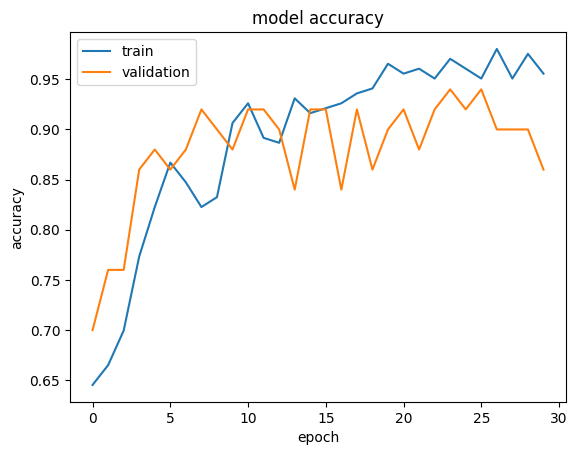

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

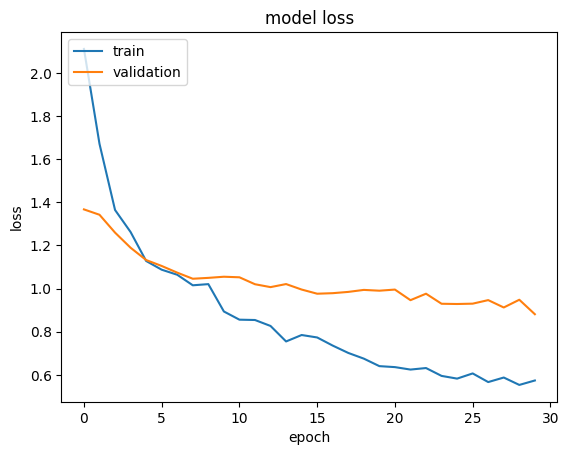

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(val_ds, verbose=1)
print("Model performance on test data: ")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 151ms/step - loss: 0.8812 - accuracy: 0.8600
Model performance on test data: 
Test loss: 0.8812362551689148
Test accuracy: 0.8600000143051147


2/2 [==============================] - 1s 171ms/step


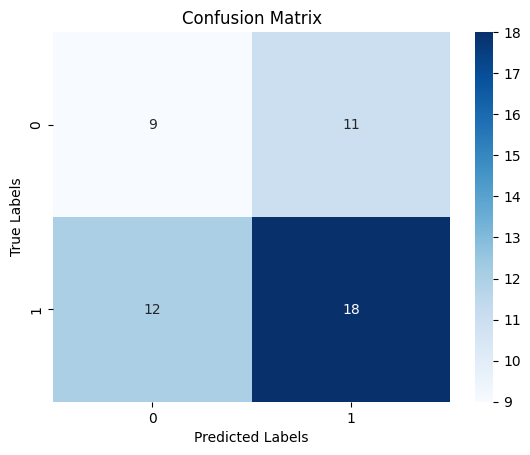

In [15]:
# Generate predictions for the test set
predictions = model.predict(val_ds)
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = (predictions > 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
!pip install Pillow

In [17]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/brain_tumor_dataset/no/20 no.jpg')
im.show()

In [18]:
# Test an image for prediction
image_path = '/content/drive/MyDrive/brain_tumor_dataset/no/20 no.jpg'

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

img = load_img(image_path, target_size=image_size)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

1/1 [==============================] - 1s 809ms/step
Prediction: Non-Tumor


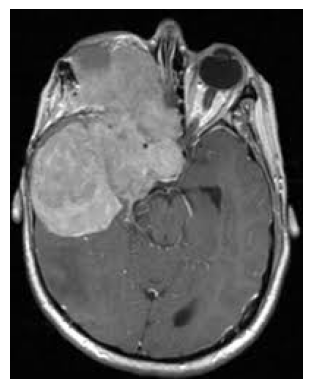

In [20]:
# Generate prediction
prediction = model.predict(img_array)
class_label = 'Tumor' if prediction[0][0] > 0.5 else 'Non-Tumor'
print('Prediction:', class_label)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/MyDrive/brain_tumor_dataset/yes/Y106.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()